In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
dataset = pd.read_csv('indian_music_dataset_5000.csv')


In [3]:
dataset = dataset.dropna()


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [7]:
# Load the dataset
df = pd.read_csv('indian_music_dataset_5000.csv')

# Display the first few rows of the dataframe
print(df.head())


                                          track_name    artist_name  \
0             Dekhha Tenu (From "Mr. And Mrs. Mahi")  Mohammad Faiz   
1   Tum Se (From "Teri Baaton Mein Aisa Uljha Jiya")   Sachin-Jigar   
2                  Tainu Khabar Nahi - From "Munjya"   Sachin-Jigar   
3  Ve Kamleya (From "Rocky Aur Rani Kii Prem Kaha...         Pritam   
4             Tu Hain Toh (From "Mr. And Mrs. Mahi")          Bunny   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0         0.711         0.417   0.439          0.000000    0.1930    -6.901   
1         0.680         0.612   0.595          0.000001    0.1040    -6.356   
2         0.777         0.588   0.595          0.000000    0.1530    -7.493   
3         0.810         0.468   0.658          0.033300    0.1200    -7.600   
4         0.940         0.635   0.273          0.000000    0.0928   -10.396   

   speechiness    tempo  valence  
0       0.0368   83.982    0.506  
1       0.0331   99.991    0

In [8]:
features_to_normalize = ['danceability', 'energy', 'acousticness', 'speechiness', 'liveness', 'loudness', 'instrumentalness', 'tempo', 'valence']


In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()


In [13]:
# Fit the scaler on the data and transform the features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the first few rows of the normalized dataframe
print(df.head())


                     track_name    artist_name  acousticness  danceability  \
0                         Sajni   Arijit Singh      1.000000      0.343545   
1      Satranga (From "ANIMAL")   Arijit Singh      0.885955      0.004376   
2                      Soulmate        Badshah      0.738441      0.859956   
3        O Maahi (From "Dunki")         Pritam      0.671501      0.754923   
4  Heeriye (feat. Arijit Singh)  Jasleen Royal      0.614479      1.000000   

     energy  instrumentalness  liveness  loudness  speechiness     tempo  \
0  0.016227          0.000874  0.155172  0.316087     0.017077  0.000000   
1  0.000000          0.000000  0.434483  0.654103     0.028689  0.119085   
2  0.300203          0.000000  0.324138  0.355148     0.081967  0.245628   
3  0.535497          0.000000  0.393103  0.478328     0.063525  0.452010   
4  0.180527          0.358879  0.044483  0.000000     0.000000  0.307108   

    valence     mood  
0  0.000000      Sad  
1  0.606780  Relaxed  
2  0.

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the function to classify moods
def classify_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return 'Happy'
    elif row['valence'] < 0.4 and row['energy'] < 0.4:
        return 'Sad'
    elif row['energy'] > 0.7 and row['tempo'] > 120:
        return 'Energetic'
    elif row['acousticness'] > 0.7 and row['tempo'] < 100:
        return 'Relaxed'
    else:
        return 'Neutral'

# Load the dataset
df = pd.read_csv('indian_music_dataset.csv')

# Display the first few rows of the dataframe before normalization
print("Before Normalization:")
print(df.head())

# Identify features to normalize
features_to_normalize = ['danceability', 'energy', 'acousticness', 'speechiness', 'liveness', 'loudness', 'instrumentalness', 'tempo', 'valence']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the first few rows of the normalized dataframe
print("After Normalization:")
print(df.head())

# Classify songs into moods
df['mood'] = df.apply(classify_mood, axis=1)

# Display the first few rows of the dataframe with the mood column
print("After Classifying Moods:")
print(df.head())

# Optionally, save the dataframe with the mood column to a new CSV file
df.to_csv('songs_with_mood.csv', index=False)



Before Normalization:
                     track_name    artist_name  acousticness  danceability  \
0                         Sajni   Arijit Singh         0.827         0.428   
1      Satranga (From "ANIMAL")   Arijit Singh         0.735         0.273   
2                      Soulmate        Badshah         0.616         0.664   
3        O Maahi (From "Dunki")         Pritam         0.562         0.616   
4  Heeriye (feat. Arijit Singh)  Jasleen Royal         0.516         0.728   

   energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  
0   0.413          0.000009    0.1080    -7.783       0.0281   79.646    0.355  
1   0.405          0.000000    0.1890    -5.810       0.0298   89.480    0.534  
2   0.553          0.000000    0.1570    -7.555       0.0376   99.930    0.604  
3   0.669          0.000000    0.1770    -6.836       0.0349  116.973    0.475  
4   0.494          0.003840    0.0759    -9.628       0.0256  105.007    0.558  
After Normalization:
  

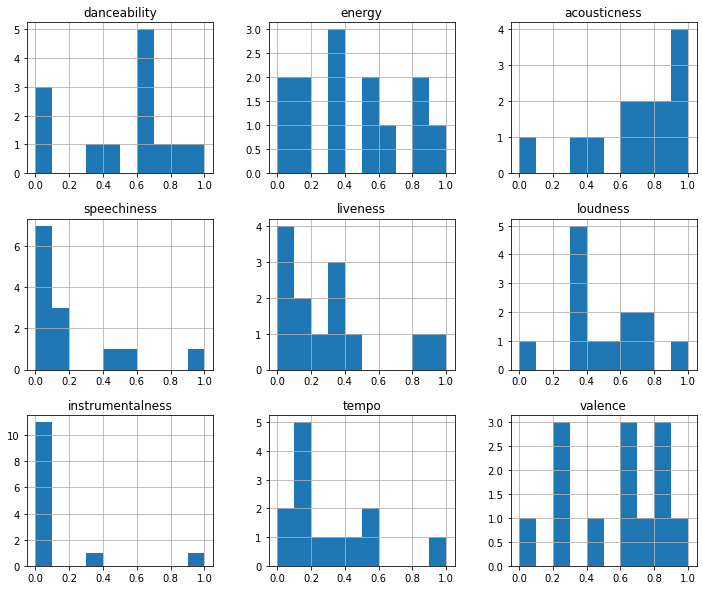

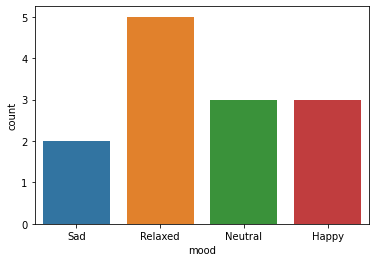

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for features
df[features_to_normalize].hist(figsize=(12, 10))
plt.show()

# Plot mood distribution
sns.countplot(data=df, x='mood')
plt.show()


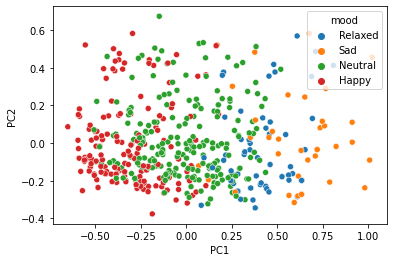

In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[features_to_normalize])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', hue=df['mood'], data=df_pca)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X = df[features_to_normalize]
y = df['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9574468085106383
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        41
     Neutral       0.94      1.00      0.97        72
     Relaxed       0.94      0.94      0.94        16
         Sad       1.00      0.58      0.74        12

    accuracy                           0.96       141
   macro avg       0.97      0.88      0.91       141
weighted avg       0.96      0.96      0.95       141



In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('songs_with_mood.csv')

# Identify features and target
features_to_normalize = ['danceability', 'energy', 'acousticness', 'speechiness', 'liveness', 'loudness', 'instrumentalness', 'tempo', 'valence']
X = df[features_to_normalize]
y = df['mood']

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9786480186480186
Accuracy: 0.9787234042553191
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        41
     Neutral       0.96      1.00      0.98        72
     Relaxed       1.00      0.94      0.97        16
         Sad       1.00      0.83      0.91        12

    accuracy                           0.98       141
   macro avg       0.99      0.94      0.96       141
weighted avg       0.98      0.98      0.98       141



In [21]:
def create_playlist(df, mood):
    return df[df['mood'] == mood]

# Example usage
happy_playlist = create_playlist(df, 'Happy')
print(happy_playlist.head())


                  track_name       artist_name  acousticness  danceability  \
9                Tera Fitoor      Arijit Singh      0.360185      0.507042   
25                   Zaalima      Arijit Singh      0.321376      0.393086   
26  Hua Main (From "ANIMAL")  Raghav Chaitanya      0.590938      0.244558   
36             Dekhte Dekhte        Atif Aslam      0.441997      0.792574   
43              Mere Sohneya     Sachet Tandon      0.582547      0.250960   

      energy  instrumentalness  liveness  loudness  speechiness     tempo  \
9   0.675644          0.050751  0.276130  0.816268     0.018462  0.517640   
25  0.921546          0.000000  0.072034  0.888147     0.372787  0.159622   
26  0.647541          0.000029  0.154896  0.822093     0.018209  0.905796   
36  0.839578          0.000000  0.138418  0.831766     0.135559  0.285069   
43  0.622951          0.000000  0.223164  0.785432     0.041730  0.519474   

     valence   mood  
9   0.735461  Happy  
25  0.654064  Happy  
26

In [37]:
import pandas as pd

# Load the dataset with moods already classified
df = pd.read_csv('songs_with_mood.csv')

# Define predefined moods
predefined_moods = ['Happy', 'Sad',  'Relaxed', 'Neutral']

def create_playlist(df, mood):
    """
    Create a playlist based on mood.
    
    Parameters:
    - df: DataFrame containing songs with mood information
    - mood: The mood to filter songs by
    
    Returns:
    - A DataFrame containing the playlist
    """
    # Filter songs based on mood
    filtered_songs = df[df['mood'] == mood]
    
    # Check if there are any songs for the given mood
    if filtered_songs.empty:
        print(f"No songs available for the mood '{mood}'.")
        return pd.DataFrame()  # Return an empty DataFrame if no songs are found
    
    return filtered_songs

def main():
    # Show predefined moods to the user
    print("Predefined Moods:")
    for mood in predefined_moods:
        print(f"- {mood}")
    
    # Get user input for mood
    user_mood = input("Enter the mood for the playlist: ").strip()
    if user_mood not in predefined_moods:
        print("Invalid mood. Please choose from the predefined moods.")
        return
    
    # Create the playlist
    playlist = create_playlist(df, user_mood)
    
    if not playlist.empty:
        # Display the playlist
        print(f"\nYour playlist for mood '{user_mood}':")
        print(playlist[['track_name', 'artist_name', 'mood']])
        
        # Optionally, save the playlist to a CSV file
        playlist.to_csv(f'playlist_{user_mood}.csv', index=False)
        print(f"\nPlaylist saved to 'playlist_{user_mood}.csv'.")
    else:
        print("No playlist created.")

if __name__ == "__main__":
    main()


Predefined Moods:
- Happy
- Sad
- Relaxed
- Neutral
Enter the mood for the playlist: Happy

Your playlist for mood 'Happy':
                           track_name       artist_name   mood
9                         Tera Fitoor      Arijit Singh  Happy
25                            Zaalima      Arijit Singh  Happy
26           Hua Main (From "ANIMAL")  Raghav Chaitanya  Happy
36                      Dekhte Dekhte        Atif Aslam  Happy
43                       Mere Sohneya     Sachet Tandon  Happy
..                                ...               ...    ...
440                  Haalaake Marunne      Vishnu Vijay  Happy
441  Thiru Thiru Thiruvananthapurathu       Jakes Bejoy  Happy
445           Cold Heart - PNAU Remix        Elton John  Happy
456                         As It Was      Harry Styles  Happy
466                             Woman          Doja Cat  Happy

[148 rows x 3 columns]

Playlist saved to 'playlist_Happy.csv'.


In [12]:
import requests
import pandas as pd
from tqdm import tqdm
import time

# Replace these with your Spotify API credentials
SPOTIPY_CLIENT_ID = '6d21e265073649828becd73dc9878fee'
SPOTIPY_CLIENT_SECRET = '8fcb6e03eb83401bae76bb9604c92882'
# Authenticate with Spotify API
auth_url = 'https://accounts.spotify.com/api/token'
auth_response = requests.post(auth_url, {
    'grant_type': 'client_credentials',
    'client_id': SPOTIPY_CLIENT_ID,
    'client_secret': SPOTIPY_CLIENT_SECRET,
})
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

# Headers for Spotify API requests
headers = {
    'Authorization': f'Bearer {access_token}'
}

# Load your dataset
df = pd.read_csv('indian_music_dataset.csv')

# Function to get track details from Spotify
def get_track_details(track_name, artist_name):
    search_url = 'https://api.spotify.com/v1/search'
    query = f"track:{track_name} artist:{artist_name}"
    search_response = requests.get(search_url, headers=headers, params={'q': query, 'type': 'track', 'limit': 1})
    search_results = search_response.json()
    if search_results['tracks']['items']:
        track = search_results['tracks']['items'][0]
        preview_url = track.get('preview_url')
        album_images = track['album']['images']
        album_art_url = album_images[0]['url'] if album_images else None
        return preview_url, album_art_url
    else:
        return None, None

# Fetch album art and audio preview
df['audio_url'] = None
df['album_art_url'] = None

# Progress bar setup
progress_bar = tqdm(total=len(df), desc="Fetching Spotify data", unit="song")

for index, row in df.iterrows():
    audio_url, album_art_url = get_track_details(row['track_name'], row['artist_name'])
    df.at[index, 'audio_url'] = audio_url
    df.at[index, 'album_art_url'] = album_art_url
    progress_bar.update(1)
    time.sleep(0.1)  # Adding a small delay to avoid hitting rate limits

progress_bar.close()

# Save updated dataset
df.to_csv('songs_with_mood_and_spotify_data.csv', index=False)


Fetching Spotify data: 100%|███████████████████████████████████████████████████████| 468/468 [06:10<00:00,  1.26song/s]


In [14]:
import pandas as pd

# Load the updated dataset
df = pd.read_csv('songs_with_mood_and_spotify_data.csv')

# Print the column names
print(df.columns)


Index(['track_name', 'artist_name', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'audio_url', 'album_art_url'],
      dtype='object')


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Spotify API credentials
client_id = '6d21e265073649828becd73dc9878fee'
client_secret = '8fcb6e03eb83401bae76bb9604c92882'

# Authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_session=False)

# Function to get track features
def get_track_features(track_id):
    features = sp.audio_features(track_id)[0]
    return features

# Function to get tracks from a specific playlist
def get_tracks_from_playlist(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Example playlist IDs for Indian music (you can add more playlists)
playlist_ids = [
    #hindi
    '37i9dQZF1DXdpQPPZq3F7n',
    '37i9dQZF1DX0XUfTFmNBRM',
    '37i9dQZF1DWZNJXX2UeBij'
    
    
    # Telugu Playlists
    
    '37i9dQZF1DX5VOFoIqmrOV',  # Latest Telugu
    '37i9dQZF1DWTGda3Eyqjzr',  # Telugu Chill
    '37i9dQZF1DWTt3gMo0DLxA',  # Telugu Party
    
    
    # Tamil Playlists
    
    '37i9dQZF1DX1UGmKmt2DtZ',  # Tamil Hits
    '37i9dQZF1DWVfadOMC1ilb',  # Tamil Desi Hits
    '37i9dQZF1DWZS4GhkDZq7c',  # Tamil Romance
    
    # Kannada Playlists
    '5xJl6TmKabS1gx2mflHvOu',  # Kannada Chill
    '37i9dQZF1DWTYKFynxp6Fs',
   
     
    # English Playlists
    '37i9dQZF1DXbYM3nMM0oPk',  # Today's Top Hits
    '',  # Global Top 50
    '37i9dQZF1DX7iB3RCnBnN4'   # Pop Rising
]

# Collect track data
track_data = []

try:
    for playlist_id in playlist_ids:
        tracks = get_tracks_from_playlist(playlist_id)
        for i, item in enumerate(tracks):
            track = item.get('track')
            if track is None or track['id'] is None:
                continue

            track_id = track['id']
            track_name = track['name']
            artist_name = track['artists'][0]['name']

            try:
                features = get_track_features(track_id)
            except Exception as e:
                print(f"Error getting features for track {track_id}: {e}")
                continue

            if features:
                track_info = {
                    'track_name': track_name,
                    'artist_name': artist_name,
                    'acousticness': features['acousticness'],
                    'danceability': features['danceability'],
                    'energy': features['energy'],
                    'instrumentalness': features['instrumentalness'],
                    'liveness': features['liveness'],
                    'loudness': features['loudness'],
                    'speechiness': features['speechiness'],
                    'tempo': features['tempo'],
                    'valence': features['valence']
                }
                track_data.append(track_info)
            
            # To avoid hitting rate limits and to show progress
            if i % 10 == 0:
                print(f'Processed {i+1} tracks from playlist {playlist_id}')
            time.sleep(0.5)

except KeyboardInterrupt:
    print("Interrupted! Saving progress...")

finally:
    # Convert track data to DataFrame
    df = pd.DataFrame(track_data)
    
    # Save DataFrame to CSV
    df.to_csv('indian_music_dataset.csv', index=False)
    
    print('Dataset has been saved to indian_music_dataset.csv')
    print(f'Total tracks processed: {len(track_data)}')


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Spotify API credentials
client_id = 'Your Client Id'
client_secret = 'Your client secret'

# Authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_session=False)

# Function to get track features
def get_track_features(track_id):
    features = sp.audio_features(track_id)[0]
    return features

# Function to get tracks from a specific playlist
def get_tracks_from_playlist(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Example playlist IDs for Indian music (you can add more playlists)
playlist_ids = [
    '37i9dQZF1DWYztMONFqfvX'
]

# Collect track data
track_data = []

try:
    for playlist_id in playlist_ids:
        tracks = get_tracks_from_playlist(playlist_id)
        for i, item in enumerate(tracks):
            track = item.get('track')
            if track is None or track['id'] is None:
                continue

            track_id = track['id']
            track_name = track['name']
            artist_name = track['artists'][0]['name']

            try:
                features = get_track_features(track_id)
            except Exception as e:
                print(f"Error getting features for track {track_id}: {e}")
                continue

            if features:
                track_info = {
                    'track_name': track_name,
                    'artist_name': artist_name,
                    'acousticness': features['acousticness'],
                    'danceability': features['danceability'],
                    'energy': features['energy'],
                    'instrumentalness': features['instrumentalness'],
                    'liveness': features['liveness'],
                    'loudness': features['loudness'],
                    'speechiness': features['speechiness'],
                    'tempo': features['tempo'],
                    'valence': features['valence']
                }
                track_data.append(track_info)
            
            # To avoid hitting rate limits and to show progress
            if i % 10 == 0:
                print(f'Processed {i+1} tracks from playlist {playlist_id}')
            time.sleep(0.5)

except KeyboardInterrupt:
    print("Interrupted! Saving progress...")

finally:
    # Convert track data to DataFrame
    df = pd.DataFrame(track_data)
    
    # Save DataFrame to CSV
    df.to_csv('indian_music_dataset.csv', index=False)
    
    print('Dataset has been saved to my_playlist.csv')
    print(f'Total tracks processed: {len(track_data)}')


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Processed 1 tracks from playlist 37i9dQZF1DWYztMONFqfvX


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Processed 11 tracks from playlist 37i9dQZF1DWYztMONFqfvX


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Interrupted! Saving progress...
Dataset has been saved to my_playlist.csv
Total tracks processed: 13
